# Kupffer Analysis Data Processing

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import pandas as pd
import numpy as np
import matplotlib
import threading
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
import pickle
from sklearn import preprocessing
import time
import inspect
sns.set_context('talk')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

# Preprocessing

In [2]:
workingDirectory = '/home/h1bennet/liverStrains/results/181009_kupffer_ly6c_tba/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

## ATAC QC
requires tag directories

In [3]:
%%bash
if [ ! -d ./qc_atac/ ]; then mkdir ./qc_atac; fi

In [4]:
lxr_qc = ngs_qc('./tag_directories_lxr_chip/', 'atac')

/home/h1bennet/anaconda3/envs/tba/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

In [5]:
lxr_qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
C57B6J_M_BMDM_ChIP_LXRmixSCAM_GW396518h_NJS_l20180816_CACTCA,11605108.0,84.0,0.004632,1.088,0.422,16823422.0,11935160.0,3728763.0,1159499.0,0.709437,0.931078
C57B6J_M_BMDM_ChIP_LXRmixSC_GW396518h_NJS_l20180816_GGCTAC,11094055.0,82.0,0.004469,1.098,0.417,17165768.0,11647334.0,4074882.0,1443552.0,0.678521,0.915905
C57B6J_M_BMDM_ChIP_inputXL4_GW396518h_NJS_l20180816_CTCAGA,10867345.0,186.0,0.004140,1.039,0.408,16907590.0,10897529.0,3847582.0,2162479.0,0.644535,0.872100
C57B6J_M_KupfferCell_ChIP_LXRmixSC_Control_NJS_l20180830_CAACTA,21253692.0,107.0,0.010296,1.321,0.442,39755268.0,28375338.0,5374082.0,6005848.0,0.713750,0.848930
C57B6J_M_KupfferCell_ChIP_input_Control_NJS_l20180830_CACTCA,2871238.0,135.0,0.001092,1.036,0.467,4287351.0,2749741.0,773826.0,763784.0,0.641361,0.821852


## ATAC TBA

#### Create script to run model

In [7]:
%%bash
# delete the existing script file
rm ./run_lxr_abtba.sh
# create a script file
touch ./run_lxr_abtba.sh

# if directories don't exist, create them
if [ ! -d ./bed_files/ ]; then mkdir ./bed_files; fi
if [ ! -d ./peak_sequences/ ]; then mkdir ./peak_sequences; fi
if [ ! -d ./background_files/ ]; then mkdir ./background_files; fi
if [ ! -d ./abtba_lxr_output/ ]; then mkdir ./abtba_lxr_output; fi

# for each peak file create several commands
for peak_file in ./lxr_peak_files/*;

# generate name of bed file
do bed_file=${peak_file/txt/bed};
bed_file=${bed_file/lxr_peak_files/bed_files}
# call Homer pos2bed.pl to create bed file
echo "pos2bed.pl $peak_file > $bed_file" >> ./run_lxr_abtba.sh

# generate peak sequence fasta file name
seq_file=${bed_file/peaks.bed/peaks.fasta};
seq_file=${seq_file/bed_files/peak_sequences};

# execute command to extract sequences
echo "/home/h1bennet/code/abtba/model_training/extract_sequences.py $bed_file mm10 $seq_file">> ./run_lxr_abtba.sh

# generate background coordinates
echo "/home/h1bennet/code/abtba/model_training/generate_background_coordinates.py $bed_file mm10 ./background_files/">> ./run_lxr_abtba.sh

# rename background file
bg_seq_file=${seq_file/peak_sequences/background_files};
bg_seq_file=${bg_seq_file/peaks.fasta/background.fasta};
echo "mv ./background_files/background.fasta $bg_seq_file">> ./run_lxr_abtba.sh

# calculate motif scores for peaks and background
echo "/home/h1bennet/code/abtba/model_training/create_features.py -num_procs 40 $seq_file $bg_seq_file ./abtba_lxr_output /home/h1bennet/code/abtba/default_motifs/*">> ./run_lxr_abtba.sh
combined_features=${seq_file/peak_sequences/abtba_lxr_output}
combined_features=${combined_features/.fasta/_features.tsv}
labels=${combined_features/features.tsv/labels.txt}
echo "mv ./abtba_lxr_output/combined_features.tsv $combined_features">> ./run_lxr_abtba.sh
echo "mv ./abtba_lxr_output/labels.txt $labels">> ./run_lxr_abtba.sh

# train classifier
echo "/home/h1bennet/code/abtba/model_training/train_classifier.py $combined_features $labels ./abtba_lxr_output/">> ./run_lxr_abtba.sh
coeff_path=${combined_features/features.tsv/coefficients.tsv}
performance_path=${combined_features/features.tsv/performance.tsv}
echo "mv ./abtba_lxr_output/coefficients.tsv $coeff_path">> ./run_lxr_abtba.sh
echo "mv ./abtba_lxr_output/performance.tsv $performance_path">> ./run_lxr_abtba.sh

# perform insilico mutagenesis
echo "/home/h1bennet/code/abtba/model_training/calc_feature_significance.py $combined_features $labels ./abtba_lxr_output/ -num_iterations 5 -num_procs 40">> ./run_lxr_abtba.sh
significance_path=${combined_features/features.tsv/significance.tsv}
echo mv ./abtba_lxr_output/significance.tsv $significance_path>> ./run_lxr_abtba.sh

done


### Run Homer Known Motif Analysis

In [9]:
%%bash
# delete the existing script file
rm ./run_lxr_knownmotif.sh
# create a script file
touch ./run_lxr_knownmotif.sh

# if directories don't exist, create them
if [ ! -d ./known_motif_lxr/ ]; then mkdir ./known_motif_lxr; fi

for peak_file in ./lxr_peak_files/*;

do motif_file=${peak_file/peaks.txt/known_motif_enrichment}
motif_file=${motif_file/lxr_peak_files/known_motif_lxr}
echo "findMotifsGenome.pl $peak_file mm10 $motif_file -size 200 -nomotif &" >> run_lxr_knownmotif.sh
done

# Plots

In [10]:
# make folder for figures
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

# define sample order for plotting
# samp_order=['ncorwt_bloodly6chi_controldiet',
#             'ncorwt_bloodly6clo_nashdiet',
#             'ncorwt_bloodly6chi_nashdiet',
#             'ncorwt_liverly6clo_nashdiet',
#             'ncorwt_liverly6chi_nashdiet',
#             'ncorwt_kupffer_controldiet',
#             'ncorwt_kupffertim4neg_nashdiet',
#             'ncorwt_kupffertim4pos_nashdiet']

### read in weight values

In [54]:
sample_weights_dict = {}
for f in os.listdir('./abtba_lxr_output/'):
    if 'coefficients' in f and not 'gene' in f:
        # read in coefficients
        frame = pd.read_csv('./abtba_lxr_output/' + f, sep='\t', index_col=0)
        # take the mean across cross validation iterations
        mean_weights = frame.mean(axis=1)
        sample = f.replace('_coefficients.tsv', '')
        sample_weights_dict[sample] = mean_weights
# create data frame
mean_weights_frame = pd.DataFrame(sample_weights_dict, index = sample_weights_dict[list(sample_weights_dict.keys())[0]].index.values)
mean_weights_frame = mean_weights_frame[mean_weights_frame.isnull().max(axis=1) ==False]

### read in significance values

In [55]:
sample_pval_dict = {}
for f in os.listdir('./abtba_lxr_output/'):
    if 'significance' in f and not 'gene' in f:
        # read in signifance values using pandas
        frame = pd.read_csv('./abtba_lxr_output/' + f, sep='\t', index_col=0)
        # take the mean across cross validation iterations
        mean_pval = frame.mean(axis=1) 
        sample = f.replace('_significance.tsv', '')
        sample_pval_dict[sample] = mean_pval
# create data frame
mean_pval_frame = pd.DataFrame(sample_pval_dict, index = sample_pval_dict[list(sample_pval_dict.keys())[0]].index.values)
mean_pval_frame = mean_pval_frame[mean_pval_frame.isnull().max(axis=1) ==False]

### Plot all Motifs Significance values

/home/h1bennet/anaconda3/envs/tba/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


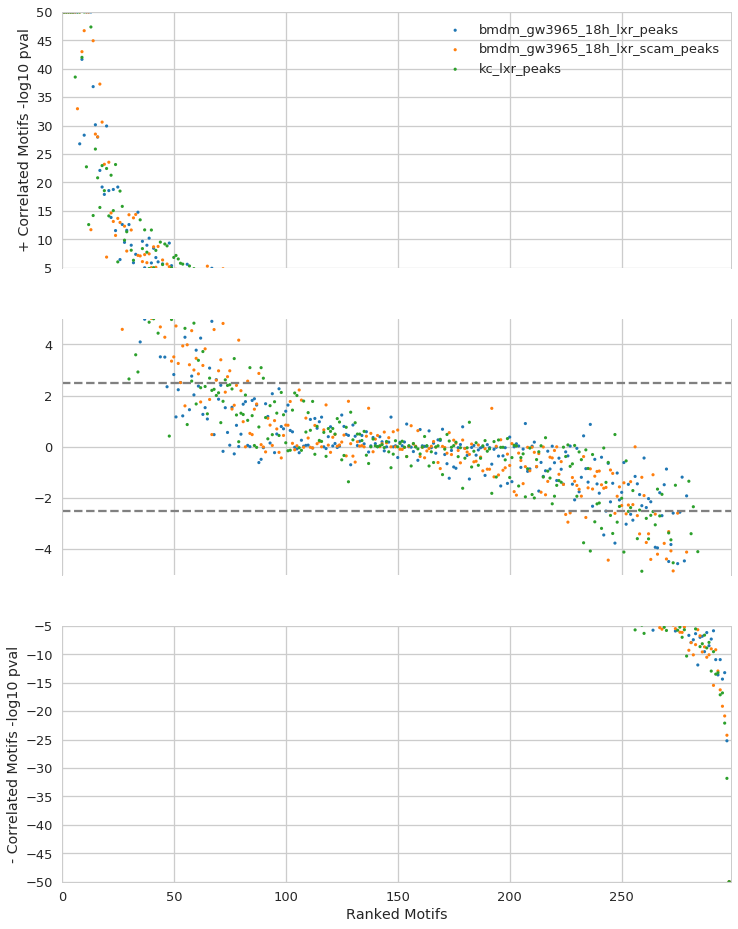

In [57]:
pseudocount = 1e-50 # set ceiling/floor for pvals
treatments = mean_pval_frame.columns
pval_threshold = 10**-2.5 # position of the dashed lines
treatment_orientedPvals_dict = {}
for treatment in treatments:
    pvals = mean_pval_frame[treatment]
    weights = mean_weights_frame[treatment]
    # calculate logpvals and assign direction according to weight
    oriented_pvals = [np.log10(x[0] +pseudocount) if x[1] < 0 else -np.log10(x[0]+pseudocount) for x in zip(pvals, weights)]
    treatment_orientedPvals_dict[treatment] = oriented_pvals

    # create data frame and sort according to mean
frame = pd.DataFrame(treatment_orientedPvals_dict, index = mean_pval_frame.index.values)
frame['mean'] = frame.mean(axis=1)
frame.sort_values('mean', ascending = False, inplace=True)
frame.drop('mean', axis=1, inplace=True)

colors = sns.color_palette()
counter = 0
with sns.axes_style('whitegrid'):
    # define subplots
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (12,16))

    for treatment in frame.columns.values:
        color = colors[counter]
        counter += 1
        # top panel
        # bottom panel
        ax1.scatter(list(range(frame.shape[0])), 
                    frame[treatment], 
                    label = treatment, 
                    c = color,
                    marker = 'o',
                    edgecolor = 'None',
                    s=10)
        
        # middle panel
        ax2.scatter(list(range(frame.shape[0])), 
                    frame[treatment], 
                    label = treatment, 
                    c = color,
                    marker = 'o',
                    edgecolor = 'None',
                    s=10)
        # bottom panel
        ax3.scatter(list(range(frame.shape[0])), 
                    frame[treatment], 
                    label = treatment, 
                    c = color,
                    marker = 'o',
                    edgecolor = 'None',
                    s=10)
        
    # scale panels
    plt.xlim(0,299)
    ax1.set_ylim(5, 50)
    ax2.set_ylim(-5, 5)  
    ax3.set_ylim(-50,-5)
    
    # hide the spines between axes
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    ax2.spines['bottom'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')  # don't put tick labels at the top
    
    ax3.xaxis.tick_bottom()
    
    ax2.axhline(xmin=0,xmax=299,y=-np.log10(pval_threshold+ pseudocount), c='grey', linestyle='--')
    ax2.axhline(xmin=0,xmax=299,y=np.log10(pval_threshold+ pseudocount), c='grey', linestyle='--')
    
    ax1.set_ylabel('+ Correlated Motifs -log10 pval')
    ax3.set_ylabel('- Correlated Motifs -log10 pval')
    ax1.legend()
    
    plt.xlabel('Ranked Motifs')


### dict to rename rows with the motif sets

In [58]:
merged_motif_dict = {}

with open('/home/h1bennet/code/abtba/motif_metadata.tsv', 'r') as f:
    f.readline()
    for i in f.readlines():
        fields = i.split()
        if 'merged' in fields[0]:
            merged_motif_dict[fields[0]]=fields[1]

### Top 20 Average Motif Significance

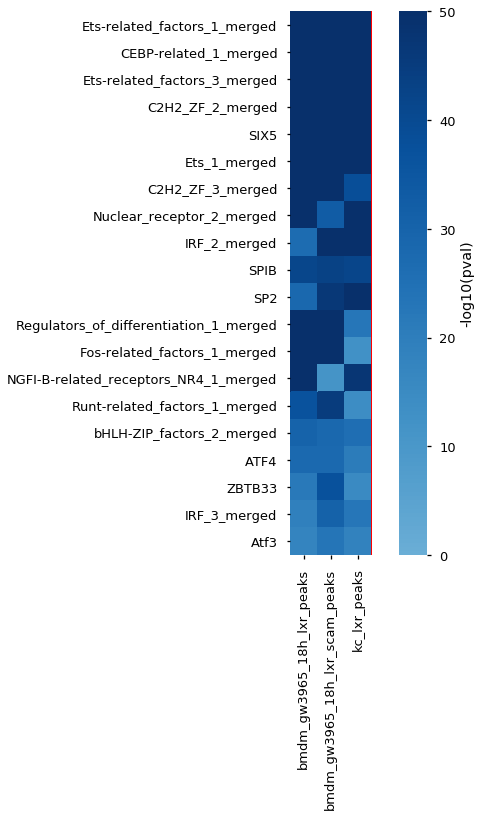

In [59]:
pseudocount = 1e-50 # pseudocount for calculating logfold change
treatments = mean_pval_frame.columns
# treatment_orientedPvals_dict = {}
for treatment in treatments:
    # retrieve pval and weights cooresponding to treatment
    pvals = mean_pval_frame[treatment]
    weights = mean_weights_frame[treatment]
    
    # calculate logpvals and assign direction according to weight
    oriented_pvals = [np.log10(x[0] +pseudocount) if x[1] < 0 else -np.log10(x[0]+pseudocount) for x in zip(pvals, weights)]

# create data frame
frame = pd.DataFrame(treatment_orientedPvals_dict, index = mean_pval_frame.index.values)
# sort by mean
frame['mean'] = frame.mean(axis=1)
frame.sort_values('mean', ascending = False, inplace=True)
frame.drop('mean', axis=1, inplace=True)

frame = frame.iloc[:20, :].loc[:, :]
# frame = frame.rename(merged_motif_dict, axis='index')

# create heatmap
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(
    frame,
    center=0,
    vmin=0,
    cbar_kws={'label': '-log10(pval)'},
    square=True,
    cmap='Blues',
    ax=ax)
pos = hm.get_position()

# draw lines to separate groups
# plt.plot([.1, .1], [0, 100], linewidth=3, color='r');
plt.plot([3, 3], [0, 100], linewidth=3, color='r');
plt.plot([5, 5], [0, 100], linewidth=3, color='orange');
plt.plot([7.9, 7.9], [0, 100], linewidth=3, color='green');

plt.savefig('./figures/tba_top20_motif_lxr_heatmap.pdf',bbox_inches='tight')

In [62]:
frame.loc['Rel_1_merged', :]

bmdm_gw3965_18h_lxr_peaks         2.231099
bmdm_gw3965_18h_lxr_scam_peaks    3.259035
kc_lxr_peaks                      6.549712
Name: Rel_1_merged, dtype: float64

### Create Heatmap of differential motifs

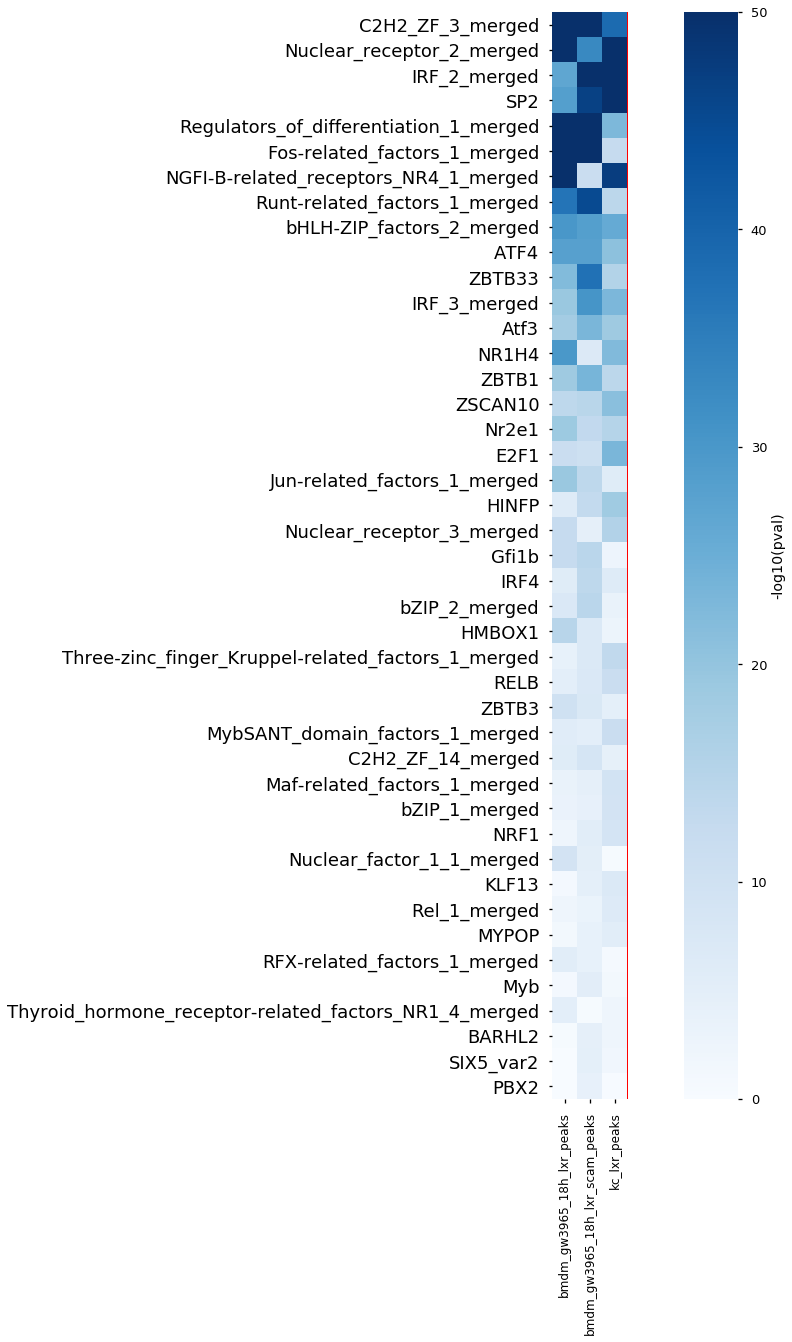

In [60]:
pseudocount = 1e-50 # pseudocount for calculating logfold change
treatments = mean_pval_frame.columns
# treatment_orientedPvals_dict = {}
for treatment in treatments:
    # retrieve pval and weights cooresponding to treatment
    pvals = mean_pval_frame[treatment]
    weights = mean_weights_frame[treatment]
    
    # calculate logpvals and assign direction according to weight
    oriented_pvals = [np.log10(x[0] +pseudocount) if x[1] < 0 else -np.log10(x[0]+pseudocount) for x in zip(pvals, weights)]
    treatment_orientedPvals_dict[treatment] = oriented_pvals

    
# create data frame
frame = pd.DataFrame(treatment_orientedPvals_dict, index = mean_pval_frame.index.values)
# sort by mean
frame['mean'] = frame.mean(axis=1)
frame.sort_values('mean', ascending = False, inplace=True)
frame.drop('mean', axis=1, inplace=True)

# plot only motifs with log pval > 2 for at least one condition (p<0.01) and positively correlated with open chromatin
frame = frame[frame.max(axis=1) > 2]
# plot only motifs with absolute log likelihood ratio >=4
filtered_frame = frame[((frame.max(axis=1) - frame.min(axis=1)).abs() >=4)]
filtered_frame = filtered_frame

# create heatmap
fig, ax = plt.subplots(figsize=(20,20))
hm = sns.heatmap(
    filtered_frame,
    vmin=0,
    cmap='Blues',
    cbar_kws={'label': '-log10(pval)'},
    square=True,
    ax=ax)
pos = hm.get_position()

hm.set_yticklabels(size=18, labels = [i[:100] for i in filtered_frame.index.values]);
hm.set_xticklabels(size=12, labels = filtered_frame.columns.values, rotation=90);

# draw lines to separate groups
# plt.plot([.1, .1], [0, 100], linewidth=3, color='r');
plt.plot([3, 3], [0, 100], linewidth=3, color='r');
plt.plot([5, 5], [0, 100], linewidth=3, color='orange');
plt.plot([7.95, 7.95], [0, 100], linewidth=3, color='green');

plt.savefig('./figures/tba_differential_motif_heatmap_all_tfs.pdf',bbox_inches='tight')

### Look for PU.1 tags at LXR Peaks

In [16]:
%%bash
# annotate real lxr peaks with tags
# annotatePeaks.pl lxr_peak_files/kc_lxr_peaks.txt mm10 -noann -nogene -d tag_directories_lxr_chip/C57B6J_M_KupfferCell_ChIP_LXRmixSC_Control_NJS_l20180830_CAACTA/ ../181018_lxr_chip_motif_analysis/tag_directories_PU1/tim4pos_control_pu1/ > ./kc_lxr_peaks_lxr_ap1_tags.txt
# annotate all open chromatin
annotatePeaks.pl ./atac_idr_peaks/ncorwt_kupffer_controldiet_0wk_atac_idr_peaks.tsv mm10 -noann -nogene -d tag_directories_lxr_chip/C57B6J_M_KupfferCell_ChIP_LXRmixSC_Control_NJS_l20180830_CAACTA/ ../181018_lxr_chip_motif_analysis/tag_directories_PU1/tim4pos_control_pu1/ > ./kc_atac_peaks_lxr_ap1_tags.txt


	Peak file = ./atac_idr_peaks/ncorwt_kupffer_controldiet_0wk_atac_idr_peaks.tsv
	Genome = mm10
	Organism = mouse
	Will Skip peak annotation
	Will Skip closest gene annotation
	Tag Directories:
		tag_directories_lxr_chip/C57B6J_M_KupfferCell_ChIP_LXRmixSC_Control_NJS_l20180830_CAACTA/
		../181018_lxr_chip_motif_analysis/tag_directories_PU1/tim4pos_control_pu1/
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 54773
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 54773
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Reading Positions...
	-----------------------
	Counting Tags in Peaks from each directory...
	Ratio for tag_directories_lxr_chip/C57B6J_M_KupfferCell_ChIP_LXRmixSC_Control_NJS_l20180830_CAACTA/ : 0.356281940007893
	Ratio fo

In [17]:
pu1_lxr_tags = pd.read_csv('./kc_lxr_peaks_lxr_ap1_tags.txt', sep='\t')
atac_pu1_lxr_tags = pd.read_csv('./kc_atac_peaks_lxr_ap1_tags.txt', sep='\t')

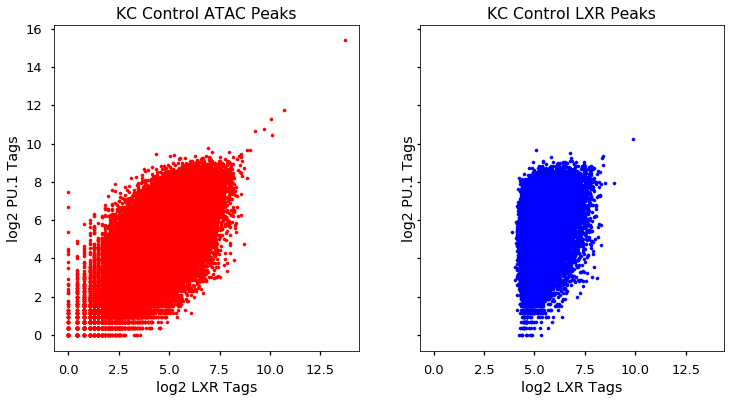

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True, sharex=True)
ax[0].scatter(
    np.log2(atac_pu1_lxr_tags.iloc[:, -2] + 1),
    np.log2(atac_pu1_lxr_tags.iloc[:, -1] + 1),
    s=10,
    c='r',
    label='atac peaks')
ax[1].scatter(
    np.log2(pu1_lxr_tags.iloc[:, -2] + 1),
    np.log2(pu1_lxr_tags.iloc[:, -1] + 1),
    s=10,
    label='lxr peaks',
    c='b')
# ax.legend()
ax[0].set_xlabel('log2 LXR Tags');
ax[0].set_ylabel('log2 PU.1 Tags');
ax[0].set_title('KC Control ATAC Peaks');
ax[1].set_xlabel('log2 LXR Tags');
ax[1].set_ylabel('log2 PU.1 Tags');
ax[1].set_title('KC Control LXR Peaks');
